# CS559: Homework #2
Assignment #2: Due on 6/25/2021 by 11:59 PM

- Change the file name as YourName_S21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

## Problem 1 - Clustering Using KMeans [35 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW2_Q1_0.csv` containing coordinates of x and y. 

1-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

Read in the data with read_csv and label the columns "X" and "Y"

In [1]:
import pandas as pd
dots = pd.read_csv('HW2_Q1_0.csv', header= None, usecols=[0,1],encoding='ISO-8859-1')
dots.columns = ["X","Y"]

1-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

Import matplotlib in order to actually plot the graph, and then call plot_inertia using kmeans, my data dots, and a range from 1 to 9 in order to display the graph. Then I determine the k value to be K=3 since it is one after the steepest change (from 1 to 2).

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

C:\Users\aughb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


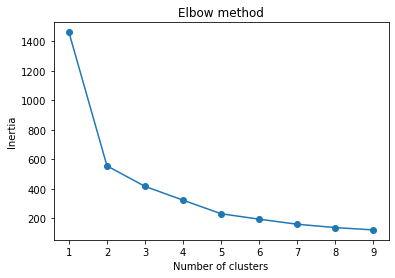

,Inertia
n = 1,1462.008530
n = 2,555.425223
n = 3,416.090217
n = 4,322.854384
n = 5,230.499667
n = 6,193.743610
n = 7,159.313427
n = 8,136.758110
n = 9,120.872247


In [3]:
plot_inertia(kmeans,dots,[1,2,3,4,5,6,7,8,9])

1-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

I think my predetermined K value of 3 is acceptable, since it is the value one after the steepest drop, which was from 1 to 2.

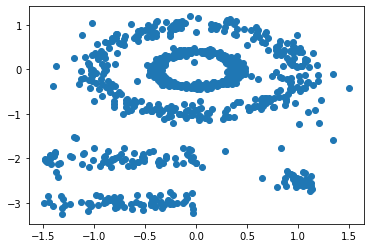

In [4]:
plt.scatter(dots["X"],dots["Y"])

1-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [5]:
import numpy as np

def MY_KMeans(data,k,n):
    #start with random indices to get my initial values
    indices = np.random.choice(len(data), k, replace=False)
    # the centroids are picked based on the random indices
    centroids = [data[indices[i]] for i in range(k)]
    #now I start calculating
    distances = []
    for i in range(data.shape[0]):
        dist = []
        # calculate distance of every point to the centroids
        for cent in centroids:
            dist.append(np.linalg.norm(cent-data[i]))
        distances.append(dist)
    # assign the closest centroid to corresponding spot in new array
    closest = np.array([np.argmin(i) for i in distances])
    # now repeat for n iterations
    for i in range(n):
        # assign new centroids based on mean of values assigned to the old centroid
        centroids = []
        for j in range(k):
            mean = data[closest==j].mean(axis=0)
            centroids.append(mean)
        # calculate new distances to closest centroid
        distances = []
        for i in range(data.shape[0]):
            dist = []
            for cent in centroids:
                dist.append(np.linalg.norm(cent-data[i]))
            distances.append(dist)
        # and assign to closest centroid again
        closest = np.array([np.argmin(i) for i in distances])
    # format centroids
    centroids = np.array(centroids)
    centroids = centroids[:,[0, 1]]
    return closest,centroids

1-e. Using `MY_KMeans` with the pre-determined $K$ value from 1-c, do the clustering.  After the clustering, find the centroid of each cluster id and report. (4 pts)

In [31]:
d = np.array(dots)
k = 3
label,cent = MY_KMeans(d,k,100)
np.reshape(cent,(2,k))
print("Centroids with k=3 and n=100:")
print(cent)

Centroids with k=3 and n=100:
[[ 0.51792055 -0.03136062]
 [-0.34349748 -2.47724848]
 [-0.40729874 -0.02188683]]


1-f. Add the cluter label to the dataframe and call it `Class`. Make a plot and indicate the centroids. (2 pts)

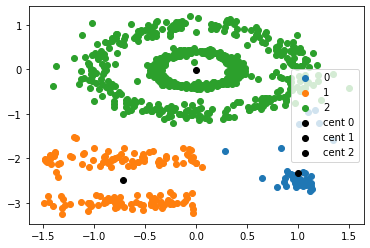

,X,Y,Class
0,-0.452720,-0.018213,2
1,-0.169793,1.073745,2
2,1.128729,-2.395042,0
3,0.122506,-0.973069,2
4,-0.409200,0.129649,2
...,...,...,...
820,0.944727,0.365376,2
821,-0.161625,-0.358271,2
822,0.147787,0.905077,2
823,-0.159311,0.425800,2


In [7]:
import matplotlib.pyplot as plt
dots["Class"] = label
for i in range(k):
    plt.scatter(d[label == i , 0] , d[label == i, 1] , label = i)
for i in range(len(cent)):
    plt.scatter(cent[i][0],cent[i][1],label="cent "+str(i),color="black")
plt.legend()
plt.show()
dots

1-g. Load a given data set `HW2_Q1_1.csv`. Here you have true cluter ids. (4 pts)
- Make a box plot by the ids and make a discrete statistical analysis. Here, you also have to make a box plot with your result from 1-f and compare. 
- Is your pre-determined $K$ value the same as the true $K$ value? Explain. 
- If not, do the clustering again using `MY_KMeans` with the true $K$ value. 

 dots
mean      1.705455
std       0.565412
median    2.000000
Name: dots, dtype: float64
 trueDots
mean      2.208485
std       1.371583
median    2.000000
Name: trueDots, dtype: float64


<AxesSubplot:>

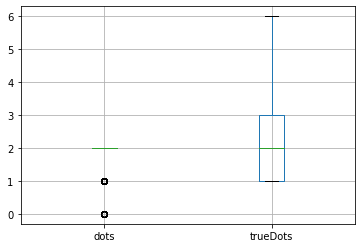

In [8]:
import pandas as pd
#Read in and format trueDots
trueDots = pd.read_csv('HW2_Q1_1.csv',header=None,encoding='ISO-8859-1')
trueDots.columns = ["X","Y","Class"]

# Combine both datasets' classes to make one graph with two boxplots
togeth = pd.DataFrame(columns=["dots","trueDots"])
togeth["dots"]= dots["Class"]
togeth["trueDots"]= trueDots["Class"]

#Discrete Statistical Analysis
print(" dots")
print( togeth["dots"].agg([pd.DataFrame.mean,pd.DataFrame.std,pd.DataFrame.median]))
print(" trueDots")
print(togeth["trueDots"].agg([pd.DataFrame.mean,pd.DataFrame.std,pd.DataFrame.median]))

#Boxplot
togeth.boxplot(column=["dots","trueDots"])

Due to dots' classes starting at 0 and trueDots' classes starting at 1, I can compare the two by adding +1 to the mean and median of dots. I cannot add +1 to the standard deviation as it is not affected by shifts in the data, only warpings. With this in mind, it makes sense that the standard deviation of dots will be smaller than that of trueDots since I had used the value k=3 where trueDots uses k=6, so dots has a smaller range of data to begin with than trueDots. Because of how densely populated the inner circle of trueDots's classes are (as shown below), it also makes sense how trueDots' boxplot is mostly contained within the values 1, 2, and 3, with a median of 2.

My pre-determined K value is not the same as the true K value as I had picked k=3 following the rule of the elbow method, whereas the true k value has been revealed to be k=6. The true classes are distinguished via the graph below, which cannot be replicated via Kmeans due to the concentric circles requiring one centroid in the middle for the inner circle, and another single point centroid that must somehow totally encase the inner circle without including it. Class 6 also is dispersed across the entire graph while remaining distinct from the other groupings.

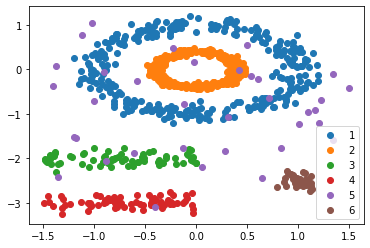

,X,Y,Class
0,-0.452720,-0.018213,2
1,-0.169793,1.073745,1
2,1.128729,-2.395042,6
3,0.122506,-0.973069,1
4,-0.409200,0.129649,2
...,...,...,...
820,0.944727,0.365376,1
821,-0.161625,-0.358271,2
822,0.147787,0.905077,1
823,-0.159311,0.425800,2


In [9]:
for i in range(1,trueDots["Class"].max()+1):
    plt.scatter(trueDots.loc[trueDots['Class'] == i]["X"],trueDots.loc[trueDots['Class'] == i]["Y"],label=i)
plt.legend()
plt.show()
trueDots

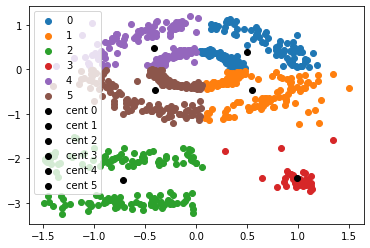

In [10]:
import matplotlib.pyplot as plt
# redo KMeans with the updated k value
k=6
label,cent = MY_KMeans(d,k,100)
dots["Class"] = label
np.reshape(cent,(2,k))

# and plot the result
for i in range(k):
    plt.scatter(d[label == i , 0] , d[label == i, 1] , label = i)
for i in range(len(cent)):
    plt.scatter(cent[i][0],cent[i][1],label="cent "+str(i),color="black")
plt.legend()
plt.show()


1-h. Evalaute your result. (5 pts)

In [11]:
# count up the number of points that were in the same grouping in dots as they were in trueDots
nCorrect = 0
for i in range(len(dots["Class"])):
    #goes from 0 to 5, goes from 1 to 6, so +1 to counter the offset
    if(dots["Class"][i]+1==trueDots["Class"][i]):
        nCorrect += 1
print("Number Correct: ", nCorrect, "out of", len(dots["Class"]))
print("Percent Correct: ", nCorrect/len(dots["Class"]))

Number Correct:  207 out of 825
Percent Correct:  0.2509090909090909


The clustering as seen from the true classifications of every value is not obtainable from this method of clustering. Since kmeans clustering is based on proximity to centroids, it would be impossible to have a single centroid contain the inner circle and then a different single centroid contain only the outer circle. Glaringly, class 6 is dispersed across the entire graph, including over other classes, which would simply not be possible with KMeans clustering. However, a good (varying) portion of points are still in the correct groupings due to the general ability to cluster the more distinguished regions like the bars on the equals sign (=) portion of the graph, as well as the dot (.) portion in the bottom right.

## Problem 2 - Clustering Using Hierarchal Clustering [10 pts]

In this problem, you will make a dendrogram using Hierarchal clustering method and compare with the result you obtained from Problem #1. 

2-a. Do the hierarchal clustering with various distances and linkages. [8 pts]

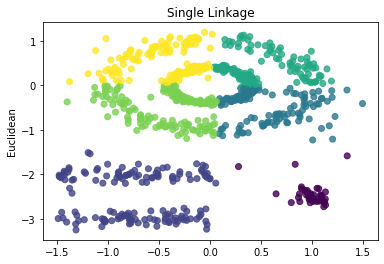

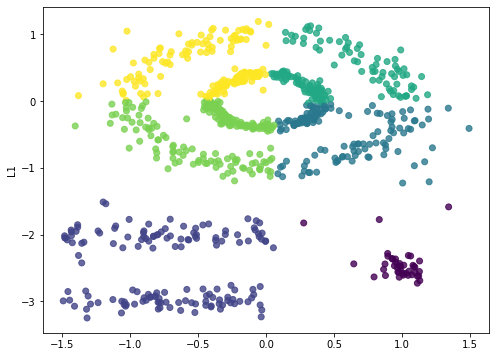

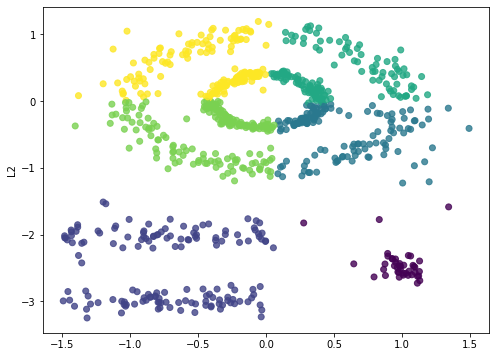

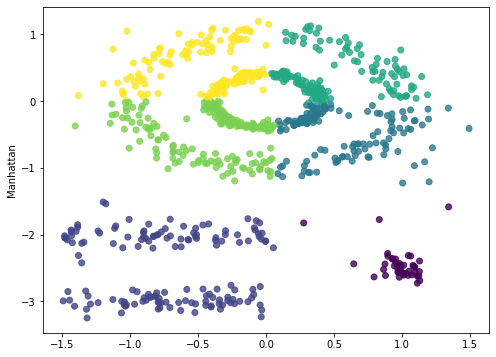

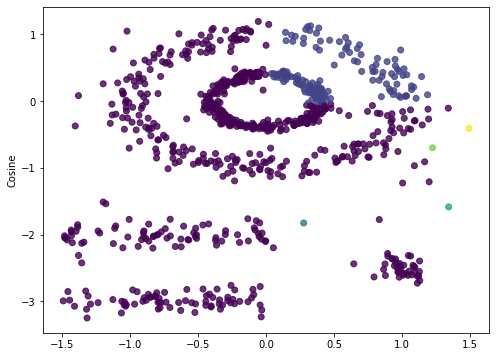

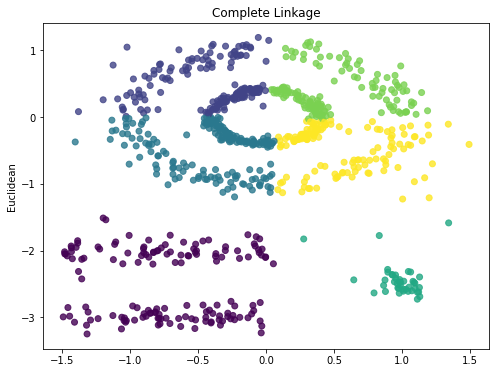

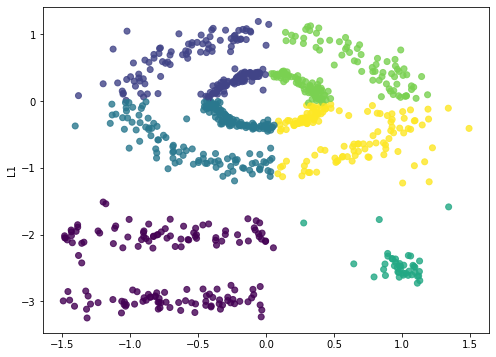

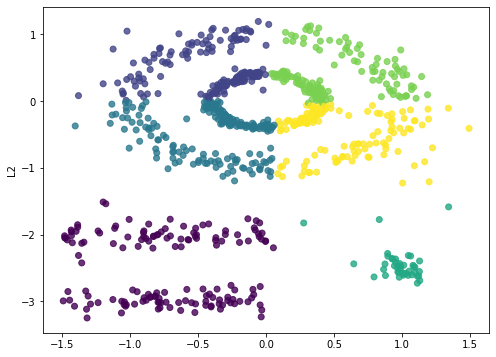

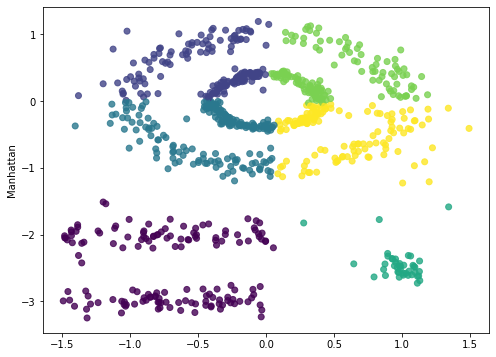

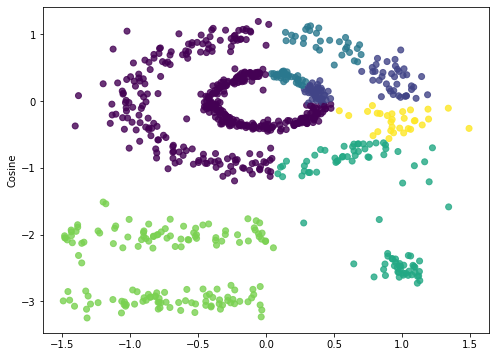

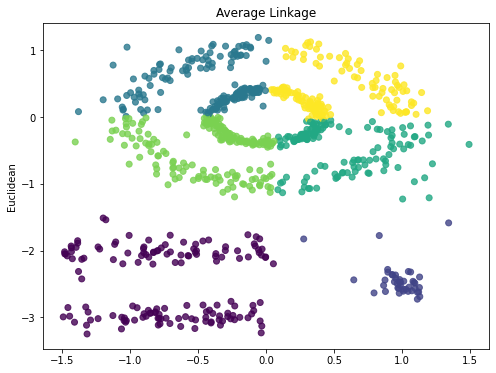

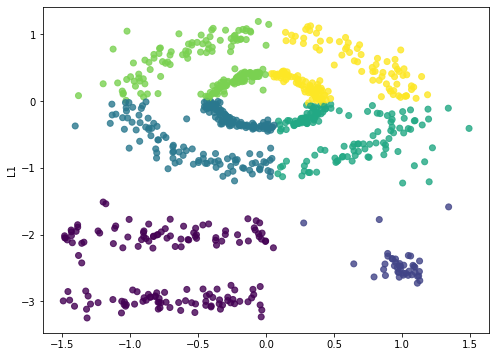

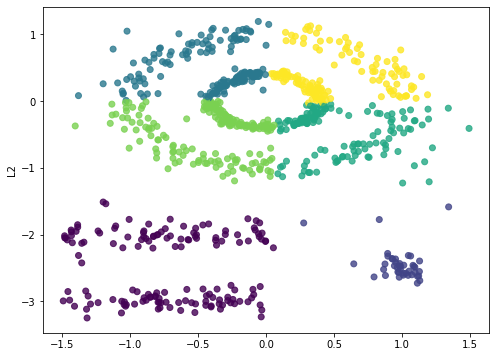

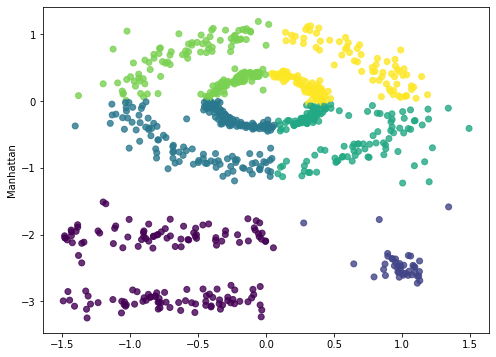

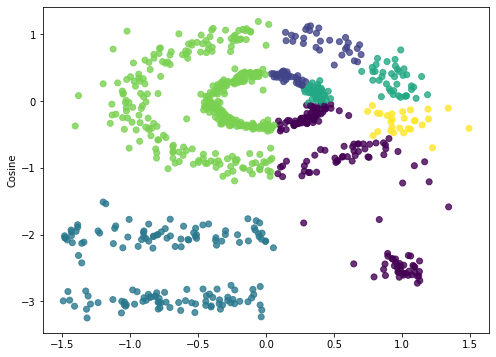

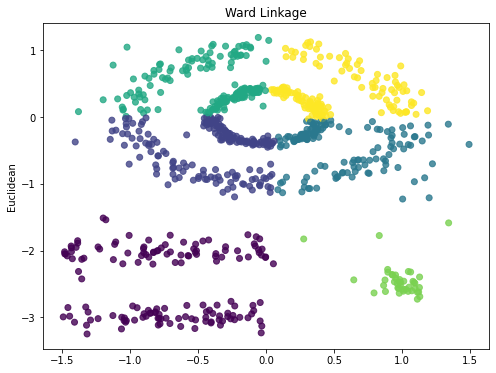

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# ALL PLOTTING THE DATA USING VARIOUS DISTANCES AND LINKAGES, DENDROGRAMS BELOW

plt.title("Single Linkage")
# set up n clusters with varying affinities and linkages
clust = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="single").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Euclidean")
# and plot them, rinse and repeat all the way down
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="l1",linkage="single").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("L1")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="l2",linkage="single").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("L2")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="manhattan",linkage="single").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Manhattan")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="cosine",linkage="single").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Cosine")
plt.show()

plt.title("Complete Linkage")
clust = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="complete").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Euclidean")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="l1",linkage="complete").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("L1")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="l2",linkage="complete").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("L2")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="manhattan",linkage="complete").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Manhattan")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="cosine",linkage="complete").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Cosine")
plt.show()

plt.title("Average Linkage")
clust = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="average").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Euclidean")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="l1",linkage="average").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("L1")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="l2",linkage="average").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("L2")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="manhattan",linkage="average").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Manhattan")
plt.show()
clust = AgglomerativeClustering(n_clusters=k,affinity="cosine",linkage="average").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Cosine")
plt.show()

plt.title("Ward Linkage")
clust = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward").fit(dots)
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(dots["X"], dots["Y"], c=clust.labels_, alpha=0.8)
plt.ylabel("Euclidean")
plt.show()

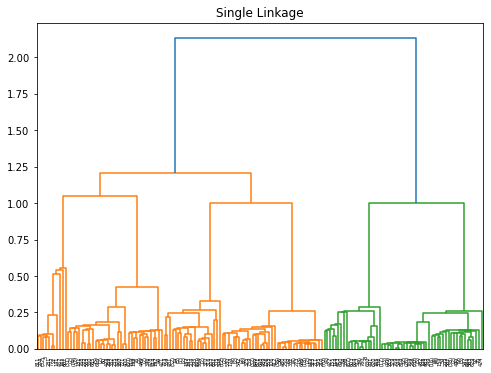

<Figure size 720x504 with 0 Axes>

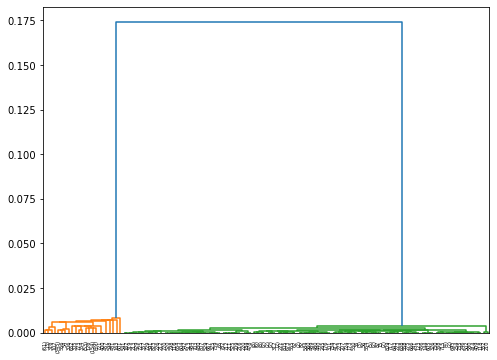

<Figure size 720x504 with 0 Axes>

In [13]:
# DENDROGRAMS
plt.title("Single Linkage")
#set up the linkage using varying methods and metrics
linked1 = linkage(dots, 
                  method='single',
                  metric='euclidean')
labelList = range(1, 826)
# limit to the top 10 levels to avoid an unreadable mess at the bottom layers (and save execution time)
dendrogram(linked1, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
# and show the plot, then rinse and repeat many times
plt.show()
linked1 = linkage(dots,
                  method='single',
                  metric='cosine')
labelList = range(1, 826)
dendrogram(linked1, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()

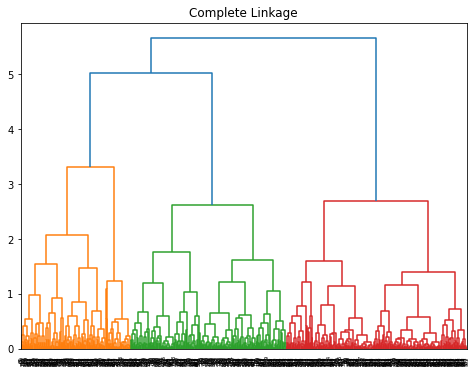

<Figure size 720x504 with 0 Axes>

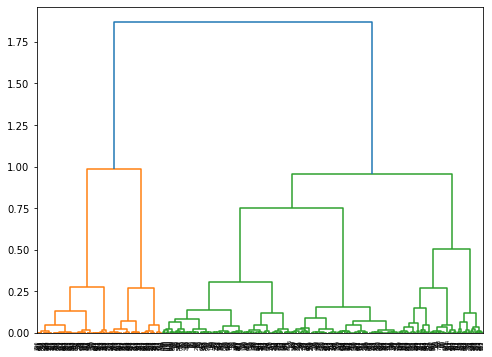

<Figure size 720x504 with 0 Axes>

In [14]:
plt.title("Complete Linkage")
linked1 = linkage(dots, 
                  method='complete',
                  metric='euclidean')
labelList = range(1, 826)
dendrogram(linked1, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()
linked1 = linkage(dots,
                  method='complete',
                  metric='cosine')
labelList = range(1, 826)
dendrogram(linked1, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()

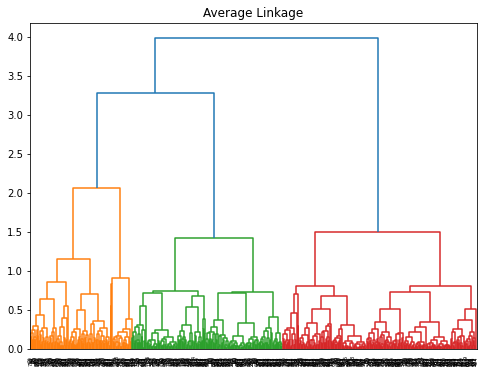

<Figure size 720x504 with 0 Axes>

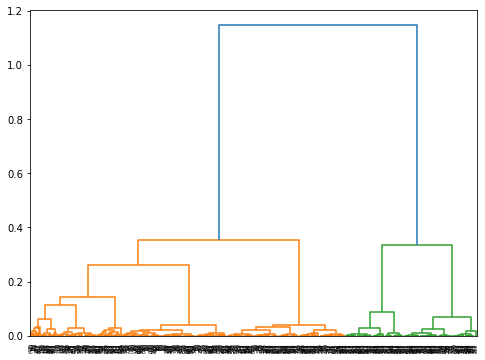

<Figure size 720x504 with 0 Axes>

In [15]:
plt.title("Average Linkage")
linked1 = linkage(dots, 
                  method='average',
                  metric='euclidean')
labelList = range(1, 826)
dendrogram(linked1, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()
linked1 = linkage(dots,
                  method='average',
                  metric='cosine')
labelList = range(1, 826)
dendrogram(linked1, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()

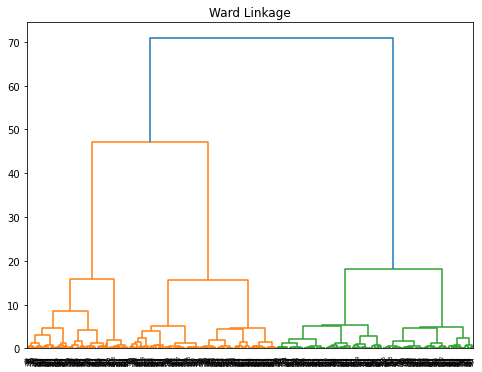

<Figure size 720x504 with 0 Axes>

In [16]:
plt.title("Ward Linkage")
linked4 = linkage(dots, 
                  method='ward',
                  metric='euclidean')
dendrogram(linked4, p=10,
            truncate_mode = 'level',
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()

2-b. Which distance and linkage provide the best and worst result? You can make numerical and/or graphical comparisons. For example, you can count the number of cluster IDs that are correctly clustered from the true labels and find its ratio. [2 pts]

Euclidean distance is certainly the best for providing understandable dendrograms; basing the metric off of cosine leads to nearly uninterpretable extremely dense bottom layers followed by very tall final agglomerations. Euclidean provides a much more readable structure. In terms of linkage, the single, complete, and average methods all show similar formations of major clusters with varying sizes, whereas the Ward linkage tends towards a balanced structure where all the clusters tend to remain relatively equal in size.

## Problem 3 - Principal Component Analysis [15 pts]

3-a. Run the following codes. 

In [17]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

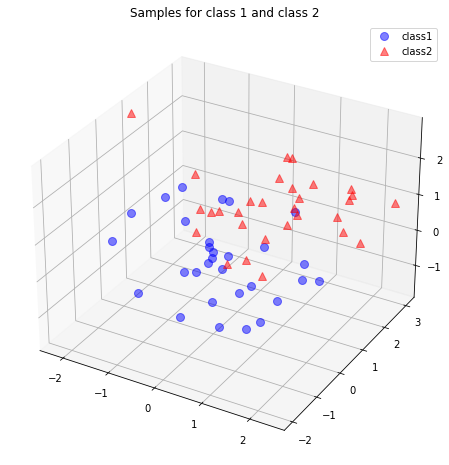

In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

3-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [10 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

1. Take the dataset w/o classes.

In [19]:
#Concatenate the two classes on axis=1 to make the shape 3x60 rather than 6x30
all_samples = np.concatenate((class1_sample,class2_sample),axis=1)
assert all_samples.shape == (3,60), "The matrix has not the dimensions 3x60"

2. Compute the d-dimentional mean vector.

In [20]:
#Simply compute the means for each subarray
mean_x = np.mean(all_samples[0])
mean_y = np.mean(all_samples[1])
mean_z = np.mean(all_samples[2])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.47343911]
 [0.52653958]
 [0.73360656]]


3. Compute the scatter matrix as following.
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$  where  $\bar{\textbf{x}}$  is the mean vector.

In [21]:
# follow the formula above
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    x_k = all_samples[:,i].reshape(3,1)
    scatter_matrix += (x_k - mean_vector).dot((x_k - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[66.33488145 15.95559213  9.38196352]
 [15.95559213 73.06156823 -0.73056383]
 [ 9.38196352 -0.73056383 73.75083116]]


Then compute the covariance matrix using np.cov() function.

In [22]:
#use np.cov to compute the covariance matrix
cov_mat = np.cov(all_samples)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.12432002  0.27043376  0.15901633]
 [ 0.27043376  1.23833166 -0.01238244]
 [ 0.15901633 -0.01238244  1.25001409]]


4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig().

In [23]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[-0.7638285 ]
 [ 0.55561224]
 [ 0.32842209]]
Eigenvalue 1 from scatter matrix: 50.694765478022525
Eigenvalue 1 from covariance matrix: 0.8592333131868222
Scaling factor:  59.00000000000002
------------------------------------------------------------
Eigenvector 2: 
[[0.64541215]
 [0.65992713]
 [0.38462884]]
Eigenvalue 2 from scatter matrix: 88.24042164015403
Eigenvalue 2 from covariance matrix: 1.4956003667822706
Scaling factor:  59.00000000000004
------------------------------------------------------------
Eigenvector 3: 
[[ 0.00303016]
 [-0.50575808]
 [ 0.86267003]]
Eigenvalue 3 from scatter matrix: 74.21209372176277
Eigenvalue 3 from covariance matrix: 1.2578320969790295
Scaling factor:  59.00000000000002
------------------------------------------------------------


5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors.

In [24]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

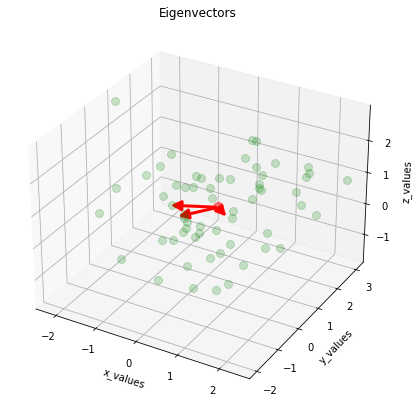

In [25]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(reverse=True)#reverse=True to sort in descending order

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])
eig_pairs

88.24042164015403
74.21209372176277
50.694765478022525


[(88.24042164015403, array([0.64541215, 0.65992713, 0.38462884])),
 (74.21209372176277, array([ 0.00303016, -0.50575808,  0.86267003])),
 (50.694765478022525, array([-0.7638285 ,  0.55561224,  0.32842209]))]

7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.

In [27]:
#reshape the pairs so when they stack matrix w is formatted properly
matrix_w = np.hstack((np.reshape(eig_pairs[0][1],(3,1)),np.reshape(eig_pairs[1][1],(3,1))))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.64541215  0.00303016]
 [ 0.65992713 -0.50575808]
 [ 0.38462884  0.86267003]]


8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [28]:
#now when I matmul it'll follow the 2x60 shape
transformed = np.matmul(np.transpose(matrix_w),all_samples)
assert transformed.shape == (2,60), "The matrix is not 2x60 dimensional."

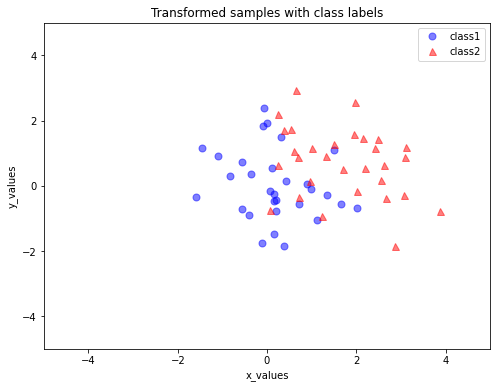

In [29]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

3-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

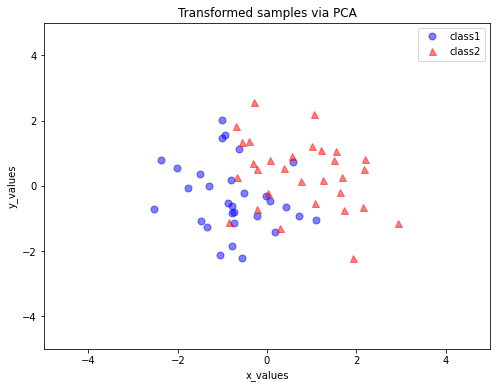

In [30]:
from sklearn.decomposition import PCA

#Use PCA to replicate what I did above
pca = PCA(n_components=2)
# transpose the data and then fit and transform the data
df = pca.fit_transform(np.transpose(all_samples))
# then transpose the whole thing to follow the structure
df = np.transpose(df)
plt.plot(df[0,0:30], df[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(df[0,30:60], df[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples via PCA')
# end result looks very similar to my implemented version
plt.show()

The two graphs, if not for the titles, are indistinguishable. This is very good for my implemented PCA as it appears to be doing the exact same thing as the predefined PCA function from sklearn.

### Problem 4 - Linear Regression [10 pts]

4. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$
Find an expression for the solution $w^*$ that minimizes this error function.

$$\frac{\partial}{\partial w} E_D(\vec{w})=-\sum_{n=1}^N r_n(t_n-\vec{w}^T\vec{x}_n)\vec{x}_n=0$$
$$\sum_{n=1}^N r_n t_n \vec{x}_n=(\sum_{n=1}^N r_n t_n \vec{x}_n\vec{x}_n^T{)}w$$
$$w=\frac{(\sum_{n=1}^{N} r_n t_n \vec{x}_n)}{(\sum_{n=1}^N r_n \vec{x}_n\vec{x}_n^T)}$$



Take a partial derivative with respect to w and then set it equal to 0.
Then solve for w by dividing everything that isnt w over to the other side for the final result.